In [24]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the tickers
tickers = ['SNY', 'PFE', 'JNJ', 'AZN', 'BAYRY', 'MRK']

# Fetch historical data
data = yf.download(tickers, start='2023-01-01', end='2023-12-31')['Adj Close']


[*********************100%%**********************]  6 of 6 completed


AZN (AstraZeneca): The annual return is approximately +1.60%. This means that over the course of the year, AstraZeneca's stock value increased by 1.60%. If you had invested in AZN at the beginning of the year, your investment would have grown by this percentage by the year's end.

BAYRY (Bayer): The annual return is approximately -25.40%. This indicates that Bayer's stock value decreased by 25.40% over the year. An investment in BAYRY would have lost over a quarter of its value.

JNJ (Johnson & Johnson): The annual return is approximately -8.52%. Johnson & Johnson's stock decreased by 8.52% over the year. This is a loss, but it's not as severe as Bayer's.

MRK (Merck): The annual return is approximately +2.60%. Merck's stock increased by 2.60% over the year, reflecting a modest positive return on investment.

PFE (Pfizer): The annual return is approximately -50.78%. Pfizer's stock saw a significant decrease, halving in value over the year, which represents a substantial loss for investors.

SNY (Sanofi): The annual return is approximately +9.11%. Sanofi had a positive year, with its stock increasing by 9.11%, indicating a healthy return for investors.

In [13]:
# Calculate daily returns
daily_returns = data.pct_change()

# Calculate annualized returns
annual_returns = daily_returns.mean() * 250  # assuming 252 trading days in a year (average)
print("Annual Returns:\n", annual_returns)


Annual Returns:
 Ticker
AZN      0.016014
BAYRY   -0.254048
JNJ     -0.085244
MRK      0.025954
PFE     -0.507773
SNY      0.091088
dtype: float64



P/E Ratio
=
Market Value per Share
Earnings per Share (EPS)
P/E Ratio= 
Earnings per Share (EPS)
Market Value per Share
​

The Price-to-Earnings (P/E) ratio is a widely used metric in stock valuation, measuring the ratio of a company's share price to its earnings per share (EPS). Essentially, the P/E ratio helps investors assess the value of a stock by comparing its current price to its earnings. It can be calculated using the following formula:


Interpretation of P/E Ratios:
High P/E Ratio: A high P/E ratio may indicate that the stock's price is high relative to its earnings, suggesting that investors are expecting high growth rates in earnings in the future. However, it could also imply that the stock is overvalued.

Low P/E Ratio: Conversely, a low P/E ratio might suggest that the stock is undervalued or that the company is experiencing difficulties. It could also indicate that the market expects lower growth or even a decline in the company's future earnings.

Comparison: The P/E ratio is often compared to the P/E ratios of other companies within the same industry, or to the market as a whole, to gauge relative valuation. Because different industries have varying growth prospects and risk profiles, a P/E ratio that's considered high in one industry might be deemed low in another.

Types of P/E Ratios:
Trailing P/E: Uses the earnings of the past 12 months for the calculation. It's the most common P/E ratio and is considered a factual measure since it's based on actual earnings.

Forward P/E: Based on future earnings guidance rather than past earnings. It reflects the market's expectation of future growth and can be more relevant when assessing a company's growth prospects.

Limitations:
While the P/E ratio is a useful tool for stock valuation, it has its limitations and should not be used in isolation:

It does not account for debt: Companies with similar P/E ratios can have very different levels of debt, affecting their risk profiles.
Growth prospects and industry context are not considered: Two companies with the same P/E ratio might have vastly different growth rates or operate in different industries with distinct average P/E ratios.
Earnings volatility: Companies with highly volatile earnings can show fluctuating P/E ratios that might not accurately reflect their long-term valuation.
Given these factors, the P/E ratio is most informative when used alongside other financial metrics and qualitative analysis of the company's prospects, industry conditions, and broader economic factors.

In [19]:
# Define the tickers
tickers = ['SNY', 'PFE', 'JNJ', 'AZN', 'BAYRY', 'MRK']

# Initialize a dictionary to store the data
metrics = {
    'Ticker': [],
    'P/E Ratio': [],
    'P/B Ratio': [],
    'Dividend Yield': [],
    'Earnings Growth Rate': [],
    'Return on Equity': [],
    'Debt to Equity': [],
    'Operating Margin': [],
    'Free Cash Flow Yield': []
}

# Fetch and store the data
for ticker in tickers:
    stock = yf.Ticker(ticker)
    info = stock.info
    
    metrics['Ticker'].append(ticker)
    metrics['P/E Ratio'].append(info.get('trailingPE', 'N/A'))
    metrics['P/B Ratio'].append(info.get('priceToBook', 'N/A'))
    metrics['Dividend Yield'].append(info.get('dividendYield', 'N/A') * 100 if info.get('dividendYield') else 'N/A')  # Convert to percentage
    metrics['Earnings Growth Rate'].append(info.get('earningsGrowth', 'N/A'))
    metrics['Return on Equity'].append(info.get('returnOnEquity', 'N/A'))
    metrics['Debt to Equity'].append(info.get('debtToEquity', 'N/A'))
    metrics['Operating Margin'].append(info.get('operatingMargins', 'N/A'))

# Convert the dictionary into a DataFrame for better visualization
df_metrics = pd.DataFrame(metrics)

print(df_metrics)

  Ticker  P/E Ratio  P/B Ratio  Dividend Yield Earnings Growth Rate  \
0    SNY  20.311687   0.794419            4.05                  N/A   
1    PFE   74.48648   1.605219            6.10                  N/A   
2    JNJ   30.38077   5.338966            3.01                  N/A   
3    AZN  35.211643   2.771300            2.18               -0.162   
4  BAYRY        N/A   0.228978            8.49                  N/A   
5    MRK      910.5   7.835147            2.42                  N/A   

   Return on Equity  Debt to Equity  Operating Margin Free Cash Flow Yield  
0           0.07272          24.776           0.16122                  N/A  
1           0.02250          65.978          -0.08555                  N/A  
2           0.18004          42.007           0.20131                  N/A  
3           0.16315          79.399           0.22041                  N/A  
4          -0.09798         141.366          -0.34751                  N/A  
5           0.00863          84.424     

**P/E Ratio (Price-to-Earnings)**

Observation: PFE shows an unusually high P/E ratio, while SNY, JNJ, and AZN have more moderate P/E ratios. MRK's P/E ratio is exceptionally high, suggesting a possible error or an outlier due to extraordinary circumstances. 

Conclusion: A moderate P/E ratio (like SNY, JNJ, AZN) suggests a potentially better investment value, assuming the companies are in similar market conditions. PFE and MRK's high ratios require further investigation to understand the reasons behind these values.

**P/B Ratio (Price-to-Book)**

Observation: JNJ and MRK have relatively high P/B ratios compared to the others, indicating the market values them more in terms of their assets. BAYRY's P/B ratio is very low, suggesting undervaluation or underperformance.

Conclusion: Higher P/B ratios for JNJ and MRK might reflect stronger market confidence in their asset values or future growth prospects. BAYRY's low P/B ratio could be a red flag or a potential undervaluation.

**Dividend Yield**

Observation: BAYRY offers the highest dividend yield, followed by PFE, with AZN offering the lowest among those with available data.

Conclusion: High dividend yields (BAYRY, PFE) could be attractive to income-focused investors. However, sustainability depends on earnings and cash flow, which are not detailed here for BAYRY.

**Earnings Growth Rate**

Observation: Only AZN has a provided earnings growth rate, which is negative.

Conclusion: AZN’s negative growth rate could be a concern, indicating recent challenges in increasing profits. The lack of data for others prevents a comprehensive comparison.

**Return on Equity (ROE)**

Observation: JNJ has the highest ROE, indicating efficient use of equity to generate profits. BAYRY’s ROE is negative, showing a loss on equity.

Conclusion: JNJ appears to be the most effective at using shareholders' equity to generate profits, while BAYRY's negative ROE raises concerns about its profitability.

**Debt to Equity (D/E)**

Observation: BAYRY has an exceedingly high D/E ratio, indicating heavy reliance on debt financing. The others have lower, albeit varied, D/E ratios.

Conclusion: BAYRY's high D/E ratio might indicate financial risk, especially if interest rates rise or if earnings are insufficient to cover debt obligations.

**Operating Margin**

Observation: AZN has the highest operating margin, suggesting operational efficiency, while BAYRY has a significantly negative operating margin.

Conclusion: AZN’s operational efficiency is commendable, potentially offering stability and profitability. BAYRY’s negative margin is a major concern, suggesting operational challenges.

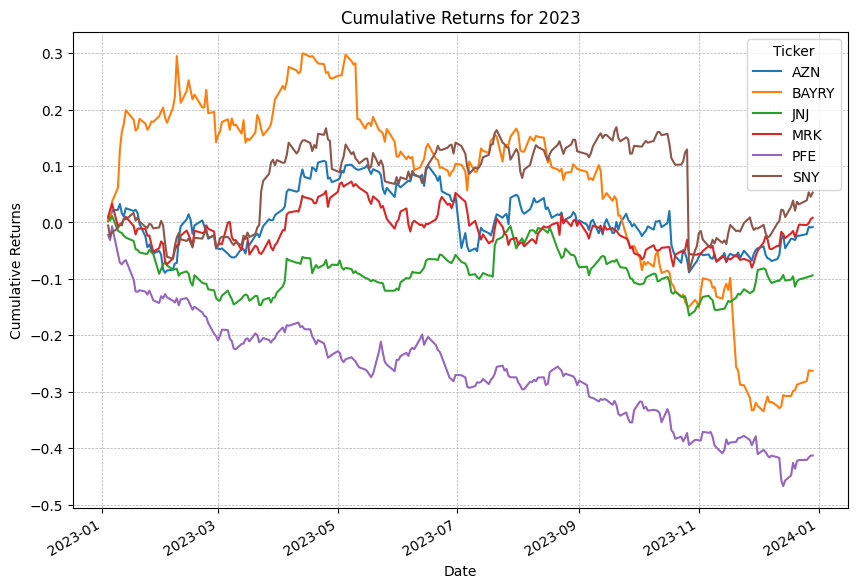

In [27]:
# Calculate cumulative returns
cumulative_returns = (1 + daily_returns).cumprod() - 1

# Plot cumulative returns
cumulative_returns.plot(figsize=(10, 7))
plt.legend(title='Ticker')
plt.title('Cumulative Returns for 2023')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.ylabel('Cumulative Returns')
plt.xlabel('Date')
plt.show()

**Volatility Analysis:**
Standard deviation of returns -> to see how risky the investments are.

<Axes: title={'center': '30-Day Rolling Volatility'}, xlabel='Date'>

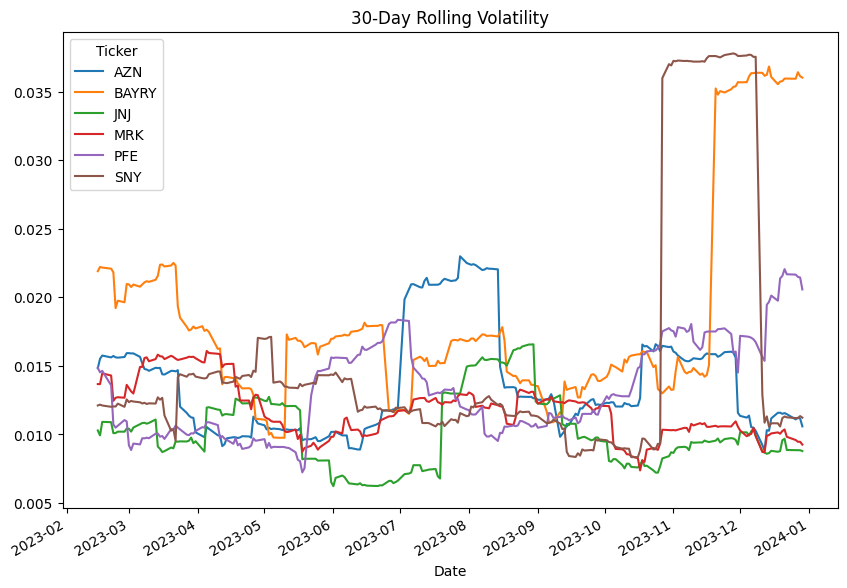

In [26]:
volatility = daily_returns.rolling(window=30).std()
volatility.plot(figsize=(10, 7), title='30-Day Rolling Volatility')

**Drawdowns:** 
Calculate and visualize drawdowns, which show the decline from a peak to a trough for each asset over time. This helps in understanding the risk of loss.

Pfizer -> Massively outperforming

JNJ -> Underperforming relative to the market/outperformer


The drawdown graph indicates that AstraZeneca (AZN) experienced significant volatility with a substantial drawdown early in 2023, suggesting a major negative event or poor performance, followed by a period of recovery. In contrast, Bayer (BAYRY) and other pharmaceutical companies like Johnson & Johnson (JNJ), Merck (MRK), Pfizer (PFE), and Sanofi (SNY) displayed relatively minor drawdowns throughout the year, indicating stable performance and potentially lower risk profiles. The stability of these companies suggests that any market or sector-wide events during this period had a less dramatic impact on them compared to AstraZeneca. Overall, AZN appears to have had a higher risk and volatility during the analyzed period, whereas BAYRY, JNJ, MRK, PFE, and SNY demonstrated more consistent and stable performances.

<Axes: title={'center': 'Drawdowns'}, xlabel='Date'>

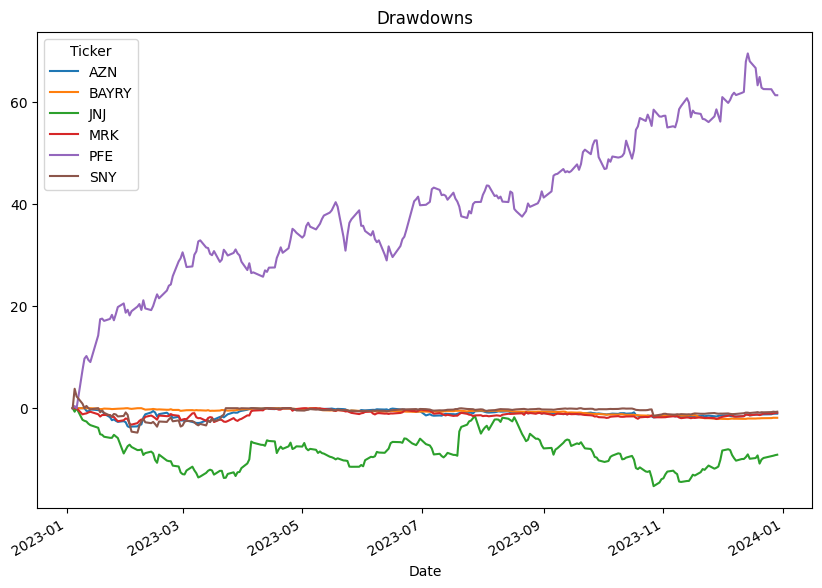

In [36]:
peak = cumulative_returns.expanding(min_periods=1).max()
drawdown = (cumulative_returns - peak) / peak
drawdown.plot(figsize=(10, 7), title='Drawdowns')

posx and posy should be finite values
posx and posy should be finite values


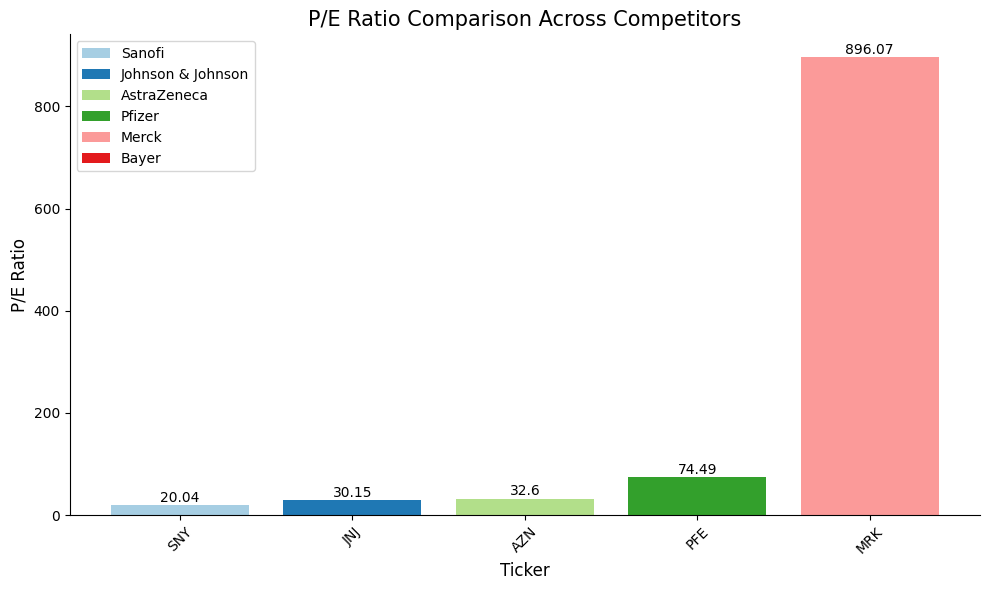

In [35]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define the tickers and corresponding company names
tickers = ['SNY', 'PFE', 'JNJ', 'AZN', 'BAYRY', 'MRK']
companies = ['Sanofi', 'Pfizer', 'Johnson & Johnson', 'AstraZeneca', 'Bayer', 'Merck']

# Fetch data
data = {ticker: yf.Ticker(ticker) for ticker in tickers}

# Extract P/E ratios
pe_ratios = {ticker: ticker_data.info.get('trailingPE', np.nan) for ticker, ticker_data in data.items()}

# Convert to DataFrame for easier plotting
pe_df = pd.DataFrame(list(pe_ratios.items()), columns=['Ticker', 'P/E Ratio'])

# Sort the DataFrame by P/E ratio
pe_df = pe_df.sort_values('P/E Ratio', ascending=True)

# Plot
plt.figure(figsize=(10, 6))
bars = plt.bar(pe_df['Ticker'], pe_df['P/E Ratio'], color=plt.cm.Paired(np.arange(len(pe_df))))

# Create a legend mapping tickers to company names
ticker_to_company = dict(zip(tickers, companies))
labels = [ticker_to_company[ticker] for ticker in pe_df['Ticker']]
plt.legend(bars, labels)

# Add value labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, round(yval, 2), ha='center', va='bottom')

# Set the title and labels
plt.title('P/E Ratio Comparison Across Competitors', fontsize=15)
plt.ylabel('P/E Ratio', fontsize=12)
plt.xlabel('Ticker', fontsize=12)
plt.xticks(rotation=45)  # Rotate the x labels to show clearly

# Optional: Remove top and right border for a cleaner look
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Show the plot
plt.tight_layout()
plt.show()
